<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/MBAIA/8DTSR/8DTSR_aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
# Carga de bibliotecas
import pandas as pd
import numpy as np
import sklearn.preprocessing as skpp

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Carga de dados
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/mtcars.csv")

<Axes: xlabel='wt', ylabel='mpg'>

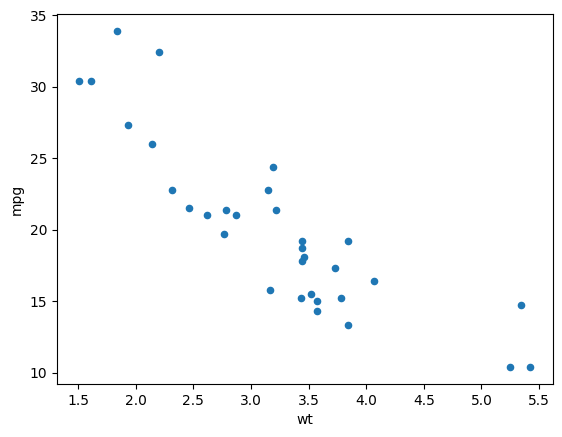

In [3]:

# Gráfico de dispersão
df.plot.scatter(x='wt', y='mpg')

In [4]:
# Análise de correlação (linear)
df[['wt', 'mpg']].corr()

,wt,mpg
wt,1.000000,-0.867659
mpg,-0.867659,1.000000


In [8]:
# Supondo que temos um comportamento de crescimento exponencial em uma determinada variável
# Podemos aplicar uma transformação inversa (fç log) para linearizar a variável
df['wt_log'] = np.log(df['wt'])
df[['wt_log', 'mpg']].corr()

,wt_log,mpg
wt_log,1.000000,-0.900081
mpg,-0.900081,1.000000


<Axes: xlabel='wt_log', ylabel='mpg'>

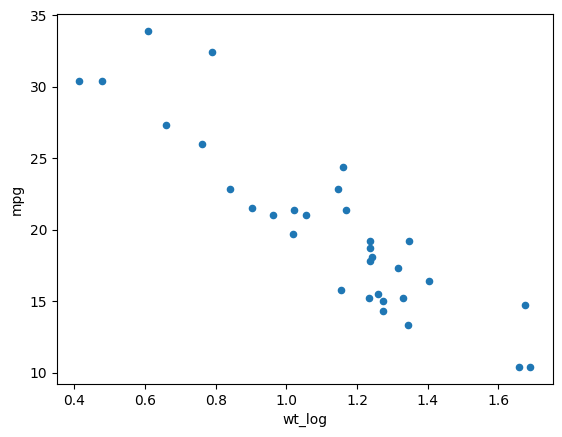

In [9]:
# Gráfico de dispersão
df.plot.scatter(x='wt_log', y='mpg')

In [126]:
# Separação treino e teste (split)
x_treino, x_teste, y_treino, y_teste = train_test_split(df[['wt']], df['mpg'], test_size=0.25, random_state=1)

dfp= x_treino.copy(deep=True)
dft = x_teste.copy(deep=True)

# Transformação polinomial
x_treino, x_teste = skpp.PolynomialFeatures(2).fit_transform(x_treino), skpp.PolynomialFeatures(2).fit_transform(x_teste)


# Regressão Linear
mod = LinearRegression()
mod.fit(x_treino, y_treino)

# R2
mod.score(x_teste, y_teste)

0.8160602969457638

In [127]:
# Coeficientes da regressão
print('Intercepto = b')
print(mod.intercept_)
print('Coef. angular = a')
print(mod.coef_)

Intercepto = b
47.97962298016815
Coef. angular = a
[  0.         -12.25476887   1.03758301]


In [120]:
# Cálculo 'na mão'
# mpg = a*wt + b
# mpg = -4.66*wt + 35.16
# x_teste = 1.o valor de x de teste é 1.513
mpg_previsto = (-4.66*1.513) + 35.16
mpg_previsto

28.109419999999997

In [128]:
# Previsão em teste
y_prev = mod.predict(x_teste)
y_teste

y_prev

array([31.81336053, 19.30523247, 18.12716725, 30.89442119, 16.22109449,
       26.04103321, 17.69890503, 19.55857353])

In [129]:
# Erro de previsão
print(mean_squared_error(y_teste, y_prev))

10.391213674791437


In [104]:
y_treino

,mpg
19,33.9
14,10.4
24,19.2
10,17.8
20,21.5
26,26.0
4,18.7
2,22.8
25,27.3
6,14.3


# Visualização gráfico do "modelo" - e impactos do feature eng após transformação de variáveis

<Axes: xlabel='wt', ylabel='mpg'>

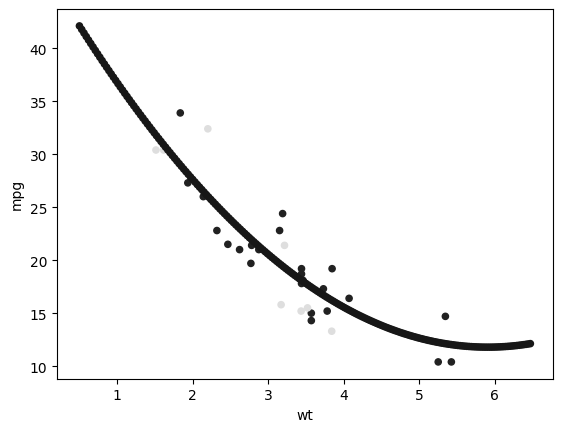

In [130]:

dfp['mpg'] = y_treino
dfp['sample'] = '0.13' # Cor diferente para treino e teste

dft['mpg'] = y_teste
dft['sample'] = '0.87' # Cor diferente para treino e teste

dfp = pd.concat([dfp, dft])

# geração dos dados "da curva" do modelo
x_fit = np.arange(0.5, 6.5, 0.03)  # Construir um array iniciando em 0.5, indo até 6.5, e "pulando" em 0.03
dff = pd.DataFrame({'wt': x_fit})
#x_fit = dff
x_fit = skpp.PolynomialFeatures(2).fit_transform(dff)

y_fit = mod.predict(x_fit)
dff['mpg']=y_fit
dff['sample']='0.09'
dfp = pd.concat([dfp, dff])

dfp.plot.scatter(x='wt', y='mpg', c='sample')